In [20]:
#list all json files
#read json files
#remove points in buffer region
#count points

In [22]:
import json
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [12]:
json_path = '/g/data1a/kl02/jss548/hail-research/HailPixel/subsets/roi'
ref_ffn   = '/g/data1a/kl02/jss548/hail-research/HailPixel/subsets/index.csv'

In [9]:
#read reference file
df = pd.read_csv(ref_ffn, header=0)
ref_dict = df.to_dict(orient='list')

In [18]:
hail_count   = 0
hail_skipped = 0
buffer_px    = 50
hail_x       = []
hail_y       = []

json_ffn_list = glob.glob(json_path + '/*.json')

for json_ffn in json_ffn_list:
    #print('reading:', json_ffn)
    #read json file 
    with open(json_ffn) as json_fh:  
        data = json.load(json_fh)
    #extract json header name
    json_header = next(iter(data))
    #extract list of regions
    point_list = data[json_header]['regions']
    #find reference x0 and y0 points
    subset_idx = int(os.path.basename(json_ffn)[0:4])
    ref_idx    = ref_dict['idx'].index(subset_idx)
    x0 = ref_dict['x0'][ref_idx]
    y0 = ref_dict['y0'][ref_idx]
    #for every region
    for point in point_list:
        #extract points
        cx = point['shape_attributes']['cx']
        cy = point['shape_attributes']['cy']
        #check if in padded regions
        if cx < 50 or cx > 500 or cy < 50 or cy > 500:
            hail_skipped += 1
            continue
        else:
            #add to lists
            hail_count += 1
            hail_x.append(x0+cx)
            hail_y.append(y0+cy)
    
print('final hail count:', hail_count)
print('final hail skipped:', hail_skipped)

    


final hail count: 46871
final hail skipped: 32089


In [23]:
hail_x_m = np.array(hail_x) * 0.0025
hail_y_m = np.array(hail_y) * 0.0025

In [26]:
print(min(hail_x_m), max(hail_x_m))
print(min(hail_y_m), max(hail_y_m))

0.3625 62.472500000000004
0.315 40.905


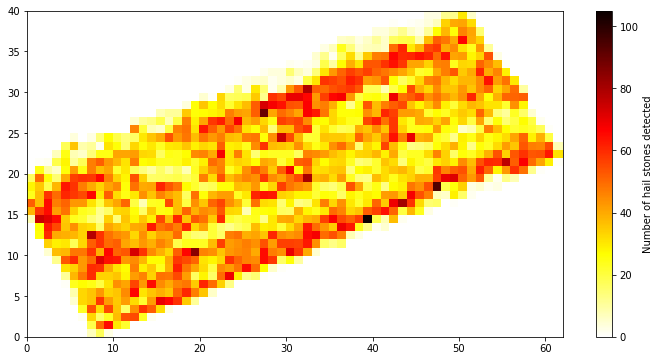

In [46]:
xbins = np.arange(0, 62.5, 1) 
ybins = np.arange(0, 41, 1)

#compute 2d hist matrix
counts, _, _ = np.histogram2d(hail_x_m, hail_y_m, bins=(xbins, ybins))

#plot 2d hist matrix 
fig = plt.figure(facecolor='white',figsize=[12,6])
ax = plt.subplot(1, 1, 1)
im = ax.pcolormesh(xbins, ybins, np.fliplr(counts.T), cmap='hot_r') #pcolormesh expect Y,X axes order

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of hail stones detected')